In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# HW 1: Histogram equalization
# develop the histogram of the equalization function and apply to an image.
# demonstrate how image constrast has been changed after the equalization.

def histogram_equalization(img):
    numPixels = img.shape[0] * img.shape[1]
    maxIntensity = np.max(img)
    uniqueIntensities, counts = np.unique(img, return_counts=True)
    pixelProbLst = counts / numPixels
    cummulativeDistLst = []
    for i in range(len(pixelProbLst)):
        cummulativeDistLst.append(np.sum(pixelProbLst[:i+1]))
    cummulativeDistLst = np.array(cummulativeDistLst)
    # new intensity values = cdf * max intensity -> round to integer
    newIntensityValues = np.round(cummulativeDistLst * maxIntensity)
    newIntensityValues = newIntensityValues.astype(np.uint8)
    newImg = np.zeros(img.shape)
    for i in range(len(newIntensityValues)):
        newImg[img == uniqueIntensities[i]] = newIntensityValues[i]
        
    newImg = newImg.astype(np.uint8)
    return newImg

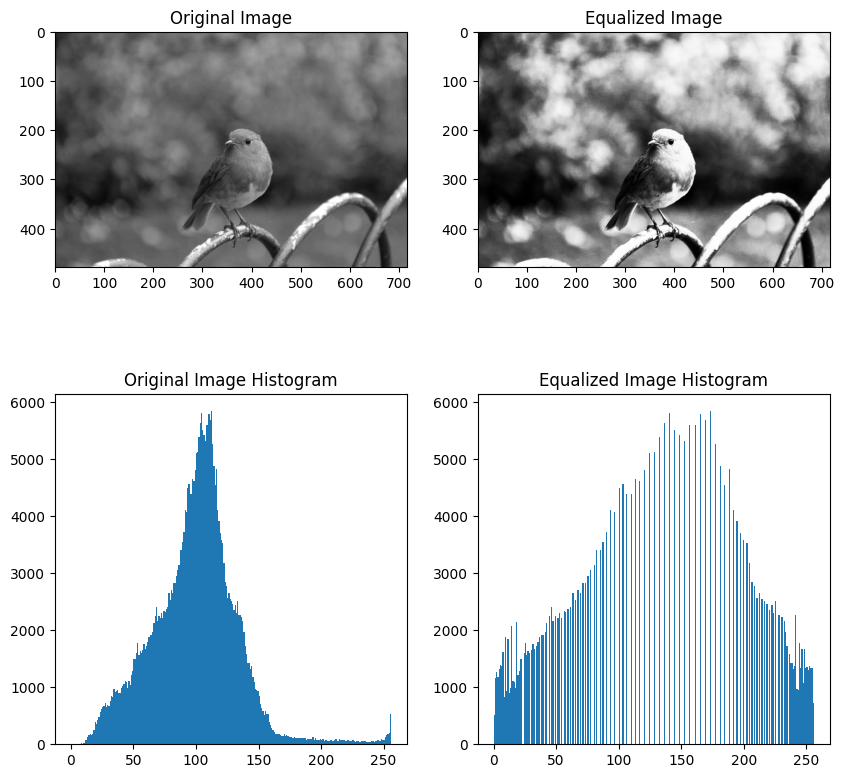

In [4]:
imagePath = "images/week5/image.png"
img = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
equalizedImg = histogram_equalization(img)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.subplot(2, 2, 2)
plt.imshow(equalizedImg, cmap='gray')
plt.title("Equalized Image")
plt.subplot(2, 2, 3)
plt.hist(img.ravel(), 256, [0, 256])
plt.title("Original Image Histogram")
plt.subplot(2, 2, 4)
plt.hist(equalizedImg.ravel(), 256, [0, 256])
plt.title("Equalized Image Histogram")
plt.show()

In [5]:
# HW 2: Histrogram specification
# apply image specification technique to a certain image. 
def histogram_specification(img, refImg):
    # step 1: get intensity
    xi_intensities, zj_numPixels = np.unique(img, return_counts=True)
    # step 2: get cdf of the original image, cdf of the reference image and the new intensity values
    yj_intensities, qj_numPixels = np.unique(refImg, return_counts=True)
    yj_cdfRefImg = np.cumsum(qj_numPixels) / np.sum(qj_numPixels)
    newIntensityValues = np.zeros(len(xi_intensities))
    for intensity in range(len(xi_intensities)):
        closestIntensity = np.argmin(np.abs(xi_intensities[intensity] - yj_intensities))
        newIntensityValues[intensity] = yj_cdfRefImg[closestIntensity]
    newIntensityValues = np.round(newIntensityValues * 255)
    newIntensityValues = newIntensityValues.astype(np.uint8)
    
    newImg = np.zeros(img.shape)
    for i in range(len(newIntensityValues)):
        newImg[img == xi_intensities[i]] = newIntensityValues[i]
        
    newImg = newImg.astype(np.uint8)
    return newImg

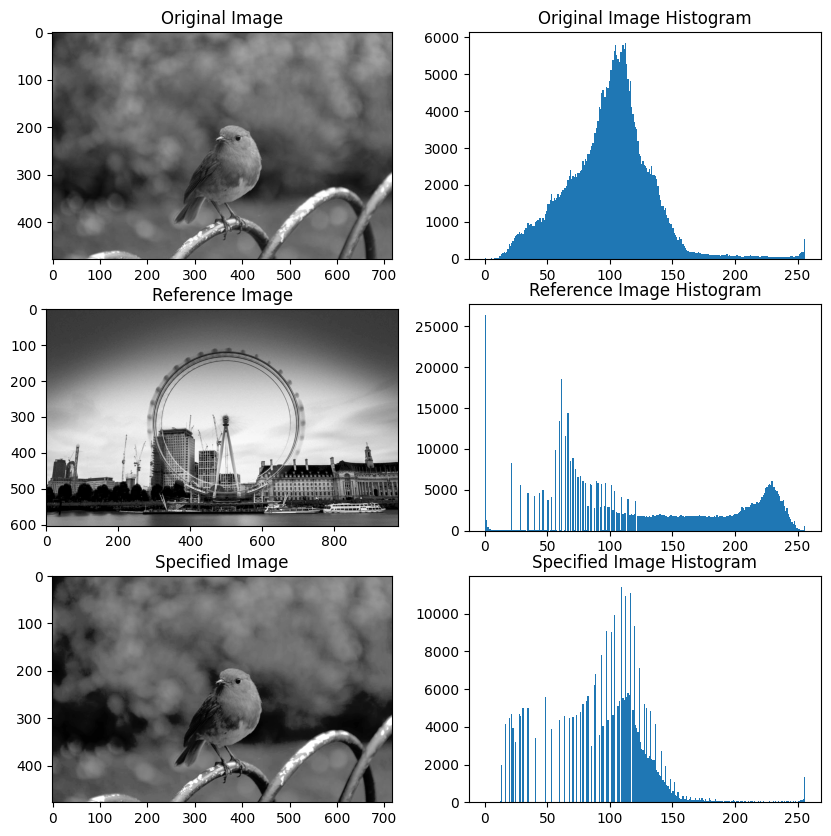

In [8]:
hw2ImagePath = "images/week5/image.png"
hw2ImagePathRef = "images/week5/image copy.png"

img = cv2.imread(hw2ImagePath, cv2.IMREAD_GRAYSCALE)
imgRef = cv2.imread(hw2ImagePathRef, cv2.IMREAD_GRAYSCALE)

specImg = histogram_specification(img, imgRef)

plt.figure(figsize=(10, 10))
plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.subplot(3, 2, 2)
plt.hist(img.ravel(), 256, [0, 256])
plt.title("Original Image Histogram")
plt.subplot(3, 2, 3)
plt.imshow(imgRef, cmap='gray')
plt.title("Reference Image")
plt.subplot(3, 2, 4)

plt.hist(imgRef.ravel(), 256, [0, 256])
plt.title("Reference Image Histogram")
plt.subplot(3, 2, 5)
plt.imshow(specImg, cmap='gray')
plt.title("Specified Image")
plt.subplot(3, 2, 6)
plt.hist(specImg.ravel(), 256, [0, 256])
plt.title("Specified Image Histogram")
plt.show()